In [1]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler

import datetime

from scipy.stats import shapiro, normaltest, kstest

import scipy.stats as sts

import statsmodels.api as sm

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# 1 Problem Statement

In [2]:
'Predict Price of flats using different Independent Variables'

'Predict Price of flats using different Independent Variables'

# 2 Data Gathering

In [11]:
df = pd.read_csv('Pune_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [9]:
# df.head()

In [5]:
#Getting to know how many non null values are present in each column and dtype of that column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#stats of numeric column

df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# 3 EDA: Exploratory Data Analysis

### 3.1 Getting idea about how many null values are present in each

In [19]:
# Getting idea about how many null values are present in each
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [20]:
df.isna().mean()*100

area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64

<AxesSubplot:>

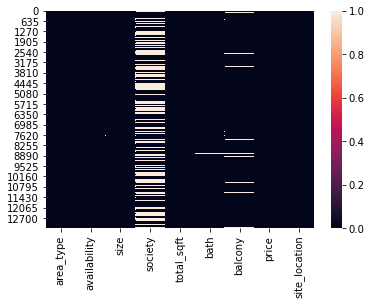

In [21]:
sns.heatmap(df.isna())

In [22]:
((df.isna().sum())/(df.shape[0]))*100

area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64

In [23]:
df.drop("society",axis=1,inplace=True)  ##droping bcoz more than 30% data is missing

### To see how many unique values and their count in each column

In [24]:
# To see how many unique values and their count in each column

# for i in df.columns.tolist():
#   print(df[i].value_counts().reset_index())
#   print()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   total_sqft     13320 non-null  object 
 4   bath           13247 non-null  float64
 5   balcony        12711 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13319 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


<AxesSubplot:>

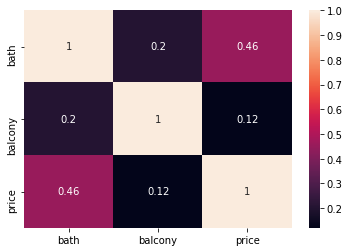

In [26]:
# Lets see corr between each variable with each other, now will get it for only 3 columns because other columns are in object format 

sns.heatmap(df.corr(),annot=True)

In [27]:
df1=df.copy()

In [28]:
df1.head(2)

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk


In [29]:
df.isna().mean()*100

area_type        0.000000
availability     0.000000
size             0.120120
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
site_location    0.007508
dtype: float64

### 3.2 area_type

In [30]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [31]:
df1=pd.get_dummies(df1,columns=["area_type"],drop_first=True)

In [32]:
df1.head(2)

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1
1,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0


### 3.3 availability

In [33]:
df1["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Jul               1
15-Dec               1
15-Aug               1
16-Oct               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [34]:
#In Availability column we have date in string format without year, we can convert it into date time and then convert it into numerical value


In [35]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [36]:
df1['availability'] = df1['availability'].apply(lambda x: x + '-2021')

In [37]:
# df1['availability'].unique()

In [38]:
import datetime

In [39]:
current_date =datetime.datetime(2022, 1, 1).date()
df1['availability'].replace({'Ready To Move-2021':'1-Jan-2021','Immediate Possession-2021':'1-Jan-2021'},inplace=True)


In [40]:
# df1['availability'].unique()

In [41]:
df2=df1.copy()

In [42]:
df2["availability"] =df2["availability"].apply(lambda x :abs((datetime.datetime.strptime(x,"%d-%b-%Y").date())-current_date).days)

In [43]:
df2.head()

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,13,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1
1,365,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0
2,365,3 BHK,1440,2.0,3.0,62.00,Anandnagar,0,0,0
3,365,3 BHK,1521,3.0,1.0,95.00,Aundh,0,0,1
4,365,2 BHK,1200,2.0,1.0,51.00,Aundh Road,0,0,1


In [44]:
df3=df2.copy()

### 3.4 size

In [45]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [46]:
df3[["First","Second"]] =df3["size"].str.split(expand=True)

In [47]:
df3.head()

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom
2,365,3 BHK,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,BHK
3,365,3 BHK,1521,3.0,1.0,95.00,Aundh,0,0,1,3,BHK
4,365,2 BHK,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,BHK


In [48]:
# df3= pd.get_dummies(df3,columns=["Second"])
# df3.head()

In [49]:
# df3.info()

In [50]:
df3.drop("size",axis=1,inplace=True) 

In [51]:
df4=df3.copy()

In [52]:
df4.head()

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom
2,365,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,BHK
3,365,1521,3.0,1.0,95.00,Aundh,0,0,1,3,BHK
4,365,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,BHK


### 3.5 total_sqft

In [53]:
df4["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [54]:
import re

def clean(s):
    pattern = re.compile(r"[\d.]+")
    try:
        s = float(s)
        
    except (ValueError):
        if s.find("-") !=-1:
            s=np.mean([float(i) for i in s.split("-")])
        elif s.endswith('Sq. Meter'):
            s = float(pattern.search(s)[0])*10.7639
        elif s.endswith('Perch'):
            s = float(pattern.search(s)[0])*0.00367309
        elif s.endswith('Sq. Yards'):
            s = float(pattern.search(s)[0])*9
        elif s.endswith('Guntha'):
            s = float(pattern.search(s)[0])*1089
        elif s.endswith('Acres'):
            s = float(pattern.search(s)[0])*43560
        elif s.endswith('ents'):
            s = float(pattern.search(s)[0])*435.56
        elif s.endswith('Grounds'):
            s = float(pattern.search(s)[0]) *2400 
    return s
            

In [55]:
df4["total_sqft"] = df4["total_sqft"].apply(clean)

In [56]:
df4["total_sqft"] = df4["total_sqft"].astype(int)

In [57]:
df4.head(2)

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom


### 3.6 site_location

In [58]:
dummies = pd.get_dummies(df4["site_location"])
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df4 =pd.concat([df4,dummies],axis="columns")
df4

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0
2,365,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,365,1521,3.0,1.0,95.00,Aundh,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
4,365,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,365,3453,4.0,0.0,231.00,Pashan,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
13316,365,3600,5.0,NaN,400.00,Paud Road,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
13317,365,1141,2.0,1.0,60.00,Pirangut,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
13318,197,4689,4.0,1.0,488.00,Prabhat Road,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df4.drop("site_location",axis=1,inplace=True)

In [61]:
df5=df4.copy()

In [62]:
df5.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
1,365,2600,5.0,3.0,120.00,0,1,0,4,Bedroom,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# df5[df5.duplicated()]  ## check duplicated rows 

In [64]:
df5.isna().mean()*100

availability    0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
                  ...   
Wakadewadi      0.000000
Wanowrie        0.000000
Warje           0.000000
Yerawada        0.000000
other           0.000000
Length: 107, dtype: float64

In [65]:
df6=df5.copy()

# 4) Feature Engineering`

In [66]:
# df6.isna().sum()

In [67]:
# (df6.isna().sum()/df6.shape[0] )*100

In [68]:
# sns.heatmap(df6.isna(),cmap="YlGnBu")

### 4.1 availability

In [69]:
# df6["availability"].value_counts()

In [70]:
df6["availability"].dtype

dtype('int64')

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability'>

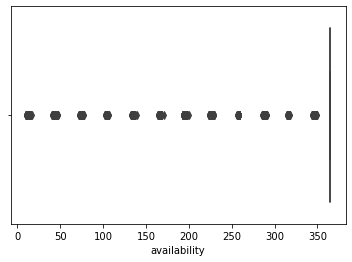

In [71]:
sns.boxplot(df6["availability"])  ## visualize the outliers

<AxesSubplot:>

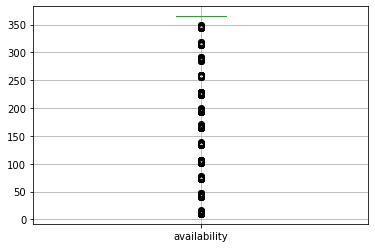

In [72]:
df6.boxplot(column=["availability"])

In [73]:
df6.shape

(13320, 107)

In [74]:
## z_score
from scipy import stats
z_score= abs(stats.zscore(df6["availability"]))
outbox = np.where(z_score>3)
df6.iloc[outbox]

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
21,13,1755,3.0,1.0,122.00,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0
27,12,1610,3.0,2.0,81.00,0,0,0,3,BHK,...,0,0,0,0,0,0,0,0,0,0
30,13,2475,4.0,0.0,186.00,0,0,1,4,BHK,...,0,0,0,0,0,0,0,0,0,0
35,11,700,2.0,1.0,36.00,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,13,1146,2.0,1.0,69.00,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
13258,13,877,1.0,1.0,59.00,0,0,1,1,BHK,...,0,0,0,0,0,0,0,0,0,0
13259,13,1477,2.0,1.0,69.50,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0
13266,12,1665,3.0,2.0,71.58,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,1.332000e+04,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,322.556757,1.827275e+03,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,97.339105,1.428667e+04,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,10.000000,1.000000e+00,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,1.100000e+03,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,1.277000e+03,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,365.000000,1.680000e+03,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
## IQR
q1 =df6["availability"].quantile(0.25)
q3 =df6["availability"].quantile(0.75)
iqr =q3-q1
upper_tail =q3+3*iqr
lower_tail =q1-3*iqr
print(upper_tail)
print(lower_tail)
print(iqr)

365.0
365.0
0.0


In [77]:
df6.loc[df6["availability"]<upper_tail,"availability"].mean()

157.3819316929857

In [78]:
df6["availability"].loc[df6["availability"]>upper_tail] 

Series([], Name: availability, dtype: int64)

In [79]:
## normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normal_scalar =MinMaxScaler()
availabilty = normal_scalar.fit_transform(df6[["availability"]])
df6["availability"] =pd.DataFrame(availabilty,columns=["availability"])
df6["availability"]

0        0.008451
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
13315    1.000000
13316    1.000000
13317    1.000000
13318    0.526761
13319    1.000000
Name: availability, Length: 13320, dtype: float64

In [80]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,1.332000e+04,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,0.880442,1.827275e+03,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,0.274195,1.428667e+04,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,0.000000,1.000000e+00,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.100000e+03,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.277000e+03,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.680000e+03,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability'>

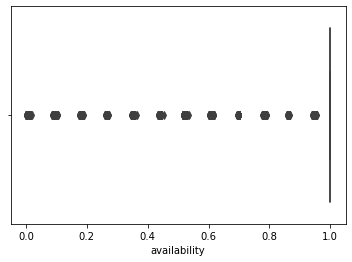

In [81]:
sns.boxplot(df6["availability"])

### 4.2 total_sqft	

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

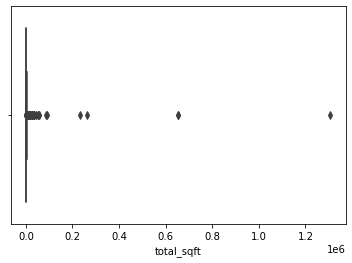

In [82]:
sns.boxplot(df6["total_sqft"])

In [83]:
## z_score
from scipy import stats
z_score= abs(stats.zscore(df6["total_sqft"]))
outbox = np.where(z_score>3)  ## return extrem outliers dataframe
df6.iloc[outbox]
# outbox
# z_score

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
1019,0.785915,231303,1.0,0.0,110.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
1086,0.783099,1306800,2.0,2.0,29.5,0,1,0,2,Bedroom,...,0,0,0,0,0,0,0,0,0,0
1894,1.000000,52272,2.0,1.0,140.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,0,0,0
6333,1.000000,91040,2.0,0.0,200.0,0,1,0,2,Bedroom,...,0,0,0,0,0,1,0,0,0,0
7001,1.000000,653340,6.0,2.0,290.0,0,1,0,8,Bedroom,...,0,0,0,1,0,0,0,0,0,0
7334,1.000000,87120,1.0,0.0,125.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
7607,1.000000,653400,3.0,1.0,217.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,0,0,0
7726,1.000000,54885,1.0,0.0,125.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
10488,1.000000,54450,2.0,2.0,200.0,0,1,0,2,Bedroom,...,0,0,0,0,0,0,0,0,0,0
11615,1.000000,261360,2.0,0.0,80.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,1,0,0


In [84]:
# z_score= abs(stats.zscore(df6["total_sqft"]))
outbox_new = np.where(z_score<3)  ## return otherthan outliers dataframe
df6["total_sqft"].iloc[outbox_new].mean()

1569.7473328324568

In [85]:
## imputation
df6["total_sqft"].iloc[outbox] = df6["total_sqft"].iloc[outbox_new].mean()

C:\Users\SHIVANSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

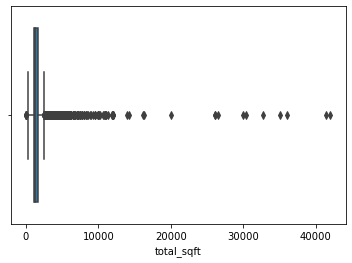

In [86]:
sns.boxplot(df6["total_sqft"])

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

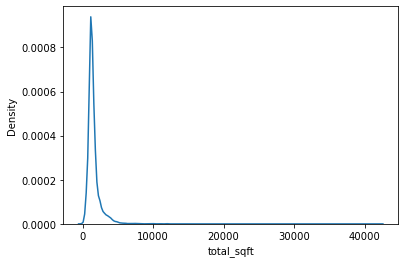

In [87]:
sns.kdeplot(df6["total_sqft"])

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

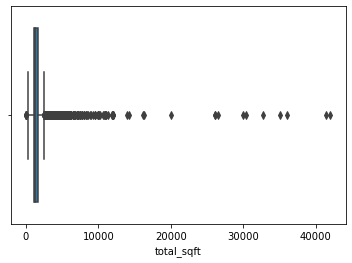

In [88]:
sns.boxplot(df6["total_sqft"])

In [89]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,13320.000000,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,0.880442,1569.747333,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,0.274195,1293.790889,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,0.000000,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1277.000000,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1680.000000,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,42000.000000,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# df6.iloc[1086]  ## cross checking with old dataset

In [91]:
## IQR
q1 =df6["total_sqft"].quantile(0.25)
q3 =df6["total_sqft"].quantile(0.75)
iqr =q3-q1
upper_tail =q3+3*iqr
lower_tail =q1-3*iqr
print(upper_tail)
print(lower_tail)
print(iqr)

3420.0
-640.0
580.0


In [92]:
# df6.loc[df6["total_sqft"]>upper_tail]

In [93]:
df6.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
1,1.000000,2600.0,5.0,3.0,120.00,0,1,0,4,Bedroom,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df7=df6.copy()

### 4.3 bath

In [95]:
df7.isna().mean()*100

availability    0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
                  ...   
Wakadewadi      0.000000
Wanowrie        0.000000
Warje           0.000000
Yerawada        0.000000
other           0.000000
Length: 107, dtype: float64

In [96]:
df7.drop("Second",axis=1,inplace=True)

In [97]:
# df7.columns

In [98]:
df8 = df7.copy()

# Imputer

In [99]:
from sklearn.impute import KNNImputer
imput =KNNImputer(n_neighbors=5)
df8 = imput.fit_transform(df8)

In [100]:
df8 =pd.DataFrame(df8,columns=df7.columns)
df8.head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df8.isna().mean()

availability    0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
               ... 
Wakadewadi      0.0
Wanowrie        0.0
Warje           0.0
Yerawada        0.0
other           0.0
Length: 106, dtype: float64

In [102]:
df8["bath"] =df8["bath"].astype(float)

In [103]:
## outliers detection
z_score_bath =abs(stats.zscore(df8["bath"]))
out_box = np.where(z_score_bath >3)
df8["bath"].iloc[out_box]
# out_box

45       9.0
64       8.0
68       7.0
85       7.0
129      7.0
        ... 
13219    9.0
13221    9.0
13226    8.0
13277    7.0
13311    9.0
Name: bath, Length: 242, dtype: float64

In [104]:
out_box_new = np.where(z_score_bath <3)
df8["bath"].iloc[out_box_new].mean()

2.589065606361828

In [105]:
df8["bath"].iloc[out_box] = df8["bath"].iloc[out_box_new].mean()

In [106]:
# df7.iloc[1019]

In [107]:
df8["balcony"] =df8["balcony"].astype(int)

In [108]:
## outliers detection
z_score_bath =abs(stats.zscore(df8["balcony"]))
out_box = np.where(z_score_bath >3)
df8["balcony"].iloc[out_box]
# out_box

Series([], Name: balcony, dtype: int32)

In [109]:
df9 =df8.copy()

In [110]:
# df8["BHK"] =df8["Second"].apply(lambda x:1 if x == "BHK" else 0)
# df8["Bedroom"] =df8["Second"].apply(lambda x:1 if x == "Bedroom" else 0)
# df8["Rk"] =df8["Second"].apply(lambda x:1 if x == "Rk" else 0)

In [111]:
df9["First"] =df9["First"].astype(float)

In [112]:
df9.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# df9.isna().sum()

In [114]:
df9.loc[df9["First"].isna()].head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other


In [115]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 106 entries, availability to other
dtypes: float64(105), int32(1)
memory usage: 10.7 MB


In [116]:
# df9.duplicated()

In [117]:
df10 =df9.copy()

In [118]:
# df9.shape

In [119]:
df10.head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1440.0,2.0,3,62.00,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1521.0,3.0,1,95.00,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1200.0,2.0,1,51.00,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature selection

# 1) method 1

In [121]:
df10.corr()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
availability,1.000000,0.030448,0.051671,0.105839,0.051455,-0.025397,0.102492,-0.138854,0.093551,0.001735,...,-0.012339,-0.004592,0.007070,-0.009520,0.005737,0.006270,-0.004721,-0.001088,0.000870,-0.021949
total_sqft,0.030448,1.000000,0.399491,0.115608,0.555704,-0.017183,0.095328,-0.091697,0.334849,-0.001686,...,0.018143,0.002258,-0.006138,-0.007221,-0.005586,0.025683,0.007236,-0.005026,-0.001279,-0.002805
bath,0.051671,0.399491,1.000000,0.215264,0.462043,-0.012537,0.351580,-0.250834,0.647865,0.004153,...,0.001678,-0.002703,-0.022417,0.001224,-0.004033,-0.006954,0.009840,-0.012487,-0.008982,-0.005027
balcony,0.105839,0.115608,0.215264,1.000000,0.097464,-0.018402,-0.098780,0.127898,0.156206,-0.006234,...,0.000691,-0.002061,-0.008481,0.003443,-0.002978,-0.009399,0.010781,0.002526,-0.001143,0.004564
price,0.051455,0.555704,0.462043,0.097464,1.000000,-0.012553,0.272669,-0.183222,0.398422,-0.000457,...,-0.009083,-0.002057,-0.013647,-0.004738,-0.006788,-0.002956,0.005357,-0.011062,-0.002656,-0.003711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wakadewadi,0.006270,0.025683,-0.006954,-0.009399,-0.002956,-0.008296,0.002107,0.001459,-0.001149,-0.010507,...,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,1.000000,-0.010469,-0.010469,-0.010469,-0.000887
Wanowrie,-0.004721,0.007236,0.009840,0.010781,0.005357,-0.008296,-0.010283,0.012415,0.009159,-0.010507,...,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,1.000000,-0.010469,-0.010469,-0.000887
Warje,-0.001088,-0.005026,-0.012487,0.002526,-0.011062,-0.008296,-0.010283,-0.000106,-0.017299,-0.010507,...,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,1.000000,-0.010469,-0.000887
Yerawada,0.000870,-0.001279,-0.008982,-0.001143,-0.002656,0.000908,-0.016478,0.013980,-0.006876,-0.010507,...,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,-0.010469,1.000000,-0.000887


## find and remove corelated fetaures

In [122]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [126]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [127]:
# correlation(df10.drop(["price"],axis=1),0.5)   ## highly correlated feature

{'Alandi Road',
 'Ambegaon Budruk',
 'Anandnagar',
 'Aundh',
 'Aundh Road',
 'Balaji Nagar',
 'Baner',
 'Baner road',
 'Bhandarkar Road',
 'Bhavani Peth',
 'Bibvewadi',
 'Bopodi',
 'Budhwar Peth',
 'Bund Garden Road',
 'Camp',
 'Chandan Nagar',
 'Dapodi',
 'Deccan Gymkhana',
 'Dehu Road',
 'Dhankawadi',
 'Dhayari Phata',
 'Dhole Patil Road',
 'Erandwane',
 'Fatima Nagar',
 'Fergusson College Road',
 'First',
 'Ganesh Peth',
 'Ganeshkhind',
 'Ghorpade Peth',
 'Ghorpadi',
 'Gokhale Nagar',
 'Gultekdi',
 'Guruwar peth',
 'Hadapsar',
 'Hadapsar Industrial Estate',
 'Hingne Khurd',
 'Jangali Maharaj Road',
 'Kalyani Nagar',
 'Karve Nagar',
 'Karve Road',
 'Kasba Peth',
 'Katraj',
 'Khadaki',
 'Khadki',
 'Kharadi',
 'Kondhwa',
 'Kondhwa Budruk',
 'Kondhwa Khurd',
 'Koregaon Park',
 'Kothrud',
 'Law College Road',
 'Laxmi Road',
 'Lulla Nagar',
 'Mahatma Gandhi Road',
 'Mangalwar peth',
 'Manik Bagh',
 'Market yard',
 'Model colony',
 'Mukund Nagar',
 'Mundhawa',
 'Nagar Road',
 'Nana Peth',


## Feature selction information gain

# 2) METHOD

In [134]:
x = df10.drop(["price"],axis=1)   ## highlu correlated feature
y =df10["price"]
# x

In [136]:
from sklearn.feature_selection import mutual_info_regression
mutal_info =mutual_info_regression(x,y)  #  mutal_info =mutual_info_regression(x_train,y_train)

# mutal_info

<AxesSubplot:>

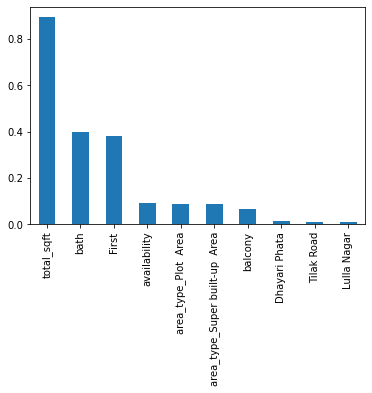

In [140]:
mutal_data =pd.Series(mutal_info,index=x.columns)
mutal_data.sort_values(ascending=False).nlargest(10).plot(kind="bar")

# 3) METHOD

### This tech gives you score of your data, higher score then more relevent is feature

In [142]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

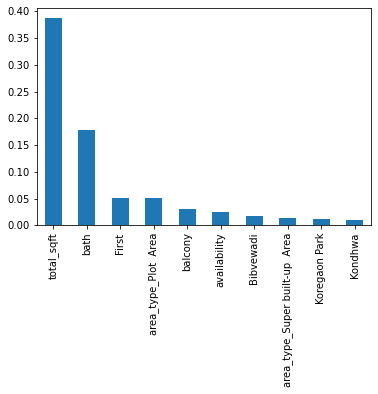

In [130]:
rank_feature =pd.Series(model.feature_importances_,index=x.columns)
rank_feature.nlargest(10).plot(kind="bar")

# 4) Method 4 variance threshold

### to remove all low variance features

In [135]:
from sklearn.feature_selection import VarianceThreshold
var_thresh =VarianceThreshold(threshold=0.0)
var_thresh.fit(x_train)   ## traing data set to avoid overffiting and on test we do transformation

VarianceThreshold()

In [139]:
x_train.shape

(10656, 105)

In [138]:
sum(var_thresh.get_support())  ## not constant feature count

105

In [140]:
constant_column =[column for column in x_train.columns if column not in x_train.columns[var_thresh.get_support()]]
constant_column

[]

In [142]:
for column in constant_column:
    print(column)   # non constant column

In [145]:
## drop in any constant column
x_train.drop(constant_column,axis=1) .head()

,availability,total_sqft,bath,balcony,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
3411,1.000000,1530.0,2.0,2,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9142,1.000000,1310.0,2.0,2,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,1.000000,1530.0,3.0,2,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2608,1.000000,2400.0,3.0,2,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9635,0.008451,1017.0,2.0,1,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5) Selectk best

In [ ]:
https://www.youtube.com/watch?v=81JSbXZ26Ls&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=3

In [143]:
from sklearn.feature_selection import SelectKBest


In [147]:
# now select 10 best feature
select_five =SelectKBest(mutual_info_regression,k=10)
select_five.fit(x_train,y_train)   ## if any isna then >> select_five.fit(x_train.fillna(0),y_train) 
# x_train.columns[select_five.get_support()]

SelectKBest(score_func=<function mutual_info_regression at 0x000001BF84AD98B0>)

In [149]:
x_train.columns[select_five.get_support()]

Index(['availability', 'total_sqft', 'bath', 'balcony', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'First', 'Navi Peth', 'Sasson Road',
       'Uruli Devachi'],
      dtype='object')

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [107]:
from sklearn.preprocessing import Normalizer,StandardScaler

# 1) Normalization

In [108]:
x =["total_sqft","bath","balcony","First"]

In [109]:
normal =MinMaxScaler()
normal_scale =normal.fit_transform(df9[x])
normal_scale_df = pd.DataFrame(normal_scale,columns=x)
# normal_scale_df

In [110]:
df10.drop(x,axis=1,inplace =True)
df10 = pd.concat([normal_scale_df,df10],axis=1)
df10.head(1)

,total_sqft,bath,balcony,First,availability,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.02512,0.192308,0.333333,0.02381,0.008451,39.07,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2) Standardization

In [111]:
df10_s =df9.copy()

In [112]:
x =["total_sqft","bath","balcony","First"]

In [113]:
std =StandardScaler()
std_scale =std.fit_transform(df10_s[x])
std_scale_df = pd.DataFrame(std_scale,columns=x)
# std_scale_df

In [114]:
df10_s.drop(x,axis=1,inplace =True)
df10_s = pd.concat([std_scale_df,df10_s],axis=1)
df10_s.head(1)

,total_sqft,bath,balcony,First,availability,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,-0.397102,-0.580099,-0.710442,-0.621324,0.008451,39.07,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5) Feature selection

In [ ]:
# Univariant Selection

### 5.1)  Normalization


In [156]:
x = df10.drop(["price"],axis=1)
y = df10["price"]


In [157]:
df10["price"] = df10["price"].astype(float)

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
df10["price"].isna().sum()

0

In [164]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
order_rank_feature =SelectKBest(score_func=chi2,k=105)
order_feature = order_rank_feature.fit(x,y)

# Feature Importnace
### This technique gives you score for feature of data, higher score more relevent is

In [165]:
from sklearn.ensemble import ExtraTreesRegressor

In [166]:
model =ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [168]:
# print(model.feature_importances_)

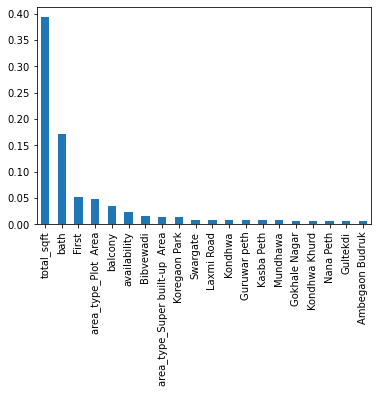

In [172]:
rank_feature = pd.Series(model.feature_importances_,index=x.columns)
rank_feature.nlargest(20).plot(kind="bar")
plt.show()

<AxesSubplot:>

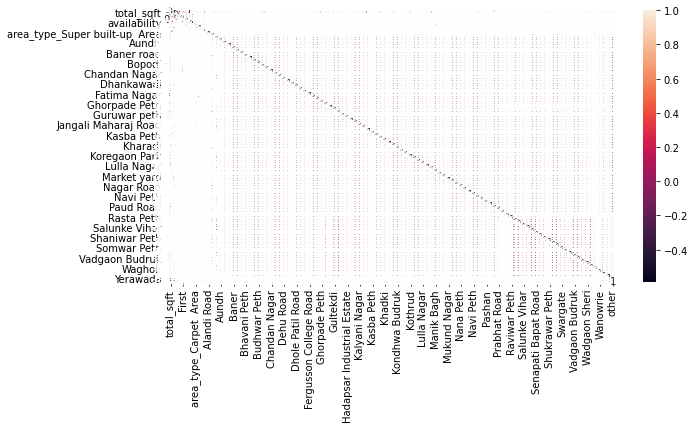

In [175]:
corr = df10.corr()
top_feature =corr.index
plt.figure(figsize=(10,5))
sns.heatmap(df10[top_feature].corr(),annot=True)

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# 6) Model Building

In [162]:
lr_model =LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [163]:
# Test Data
y_pred = lr_model.predict(x_test) 



mse = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",mae)
# del r2_score
r2score = r2_score(y_test, y_pred)
print("R2 score is :",r2score)


# Train Data

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared Error on Training data is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training data is ",mae)

r2score = r2_score(y_train, y_pred_train)
print("R2 score on Training data is :",r2score)

Mean squared value is  11893.27666080481
Root Mean Squared error is : 109.05630041774207
Mean Absolute Error is  44.95938222887771
R2 score is : 0.44138205432234934
Mean squared Error on Training data is  13673.683749086831
Root Mean Squared error is : 116.93452761732452
Mean Absolute Error on Training data is  46.78141537131594
R2 score on Training data is : 0.3899835095815557


# KNN

In [164]:
kn_model =KNeighborsRegressor()
kn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [165]:
# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.051692802147023764
r2_score 0.4050731308144586


# Hyperparameter tuning

## 1) Gridsearchcv

In [166]:
estimator = KNeighborsRegressor()
hyper_para = {"n_neighbors":np.arange(2,40),"p":[1,2]}
gscv = GridSearchCV(estimator,hyper_para,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'p': [1, 2]})

In [167]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=39, p=1)

In [168]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.17592728163869398
r2_score 0.18721586339471252


### 2) Randamizesearchcv

In [169]:
estimator = KNeighborsRegressor()
hyper_para = {"n_neighbors":np.arange(2,40),"p":[1,2]}
rscv = RandomizedSearchCV(estimator,hyper_para,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                                        'p': [1, 2]})

In [170]:
rscv.best_estimator_

KNeighborsRegressor(n_neighbors=39, p=1)

In [171]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.17592728163869398
r2_score 0.18721586339471252


### 5.2 Standardize _DF

In [172]:
x= df10_s.drop(["price"],axis=1)
y=df10_s["price"]

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [174]:
lr_model =LinearRegression()
lr_model.fit(x_train,y_train)

# Test Data
y_pred = lr_model.predict(x_test) 

mse = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",mae)
# del r2_score
r2score = r2_score(y_test, y_pred)
print("R2 score is :",r2score)

print("*"*30)
# Train Data

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared Error on Training data is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training data is ",mae)

r2score = r2_score(y_train, y_pred_train)
print("R2 score on Training data is :",r2score)

Mean squared value is  11893.276660804808
Root Mean Squared error is : 109.05630041774207
Mean Absolute Error is  44.95938222887769
R2 score is : 0.44138205432234945
******************************
Mean squared Error on Training data is  13673.683749086831
Root Mean Squared error is : 116.93452761732452
Mean Absolute Error on Training data is  46.78141537131593
R2 score on Training data is : 0.3899835095815557


# KNN

In [177]:
kn_model =KNeighborsRegressor()
kn_model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [176]:
# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.6088391332319227
r2_score 0.6762797306081121


# 1) Gridsearchcv

In [177]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.5545436087275858
r2_score 0.5156811642575471


# 2) Randamized

In [176]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

NameError: name 'x_train' is not defined